In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144

import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import os
import math

# Helper modules for processing the binary data files
import DataLoader
import FeatureExtractor
import Quaternions


In [2]:
# Define paths to load
def grab_df( subj , limb , label ):
    inDir = os.path.join( 'rabbit_run/XEED_RabbitRun_Files/' , label )
    inPaths = [ os.path.join(inDir,f) for f in os.listdir(inDir) if f.startswith(subj+'_') and limb in f ]
    assert len(inPaths)==1
    print inPaths

    df = DataLoader.loadPaths( inPaths )
    FeatureExtractor.doctor_raw_data( df )
    # Now get measurements in the proper reference frame 
    # E.g. the vertical component of acceleration, aligned with the direction of gravity
    FeatureExtractor.doctor_raw_data( df )
    # Rolling window / FFT computer
    df = FeatureExtractor.limbfeatures( df , N=160 )
    # Add a simple time counter column (to supplement the DATETIME index)
    df['T'] = np.arange(len(df)) / 32.0
    # Drop NaNs
    df = df.dropna()
    # Print resulting shape
    print 'Shape =', df.shape

    return df



In [ ]:
df_sig = None
for subj in ['X1','X2','X3','X4','X5']:
    df = grab_df( subj , 'LL' , 'walk' )
    if df_sig is None:
        df_sig = df
    else:
        df_sig = df_sig.append( df )

In [4]:
df_sig['DATETIME'] = df_sig.index
df_sig.index = range(len(df_sig))
df_sig.shape

(273759, 71)

In [3]:
def cut( df , lo , hi ):
    df = df.drop( labels=range(lo,hi) , axis=0 )
    df.index = range(len(df))
    print df.shape
    return df

In [12]:
df_sig = cut( df_sig , 90000 , 125000 )
df_sig = cut( df_sig , 200 , 750 )
df_sig = cut( df_sig , 2000 , 4400 )
df_sig = cut( df_sig , 8700 , 10600 )
df_sig = cut( df_sig , 185000 , 190000 )
df_sig = cut( df_sig , 185550 , 185800 )
df_sig = cut( df_sig , 21800 , 27000 )
df_sig = cut( df_sig , 34700 , 36200 )
df_sig = cut( df_sig , 37000 , 41000 )
df_sig = cut( df_sig , 49000 , 51000 )
df_sig = cut( df_sig , 54000 , 54500 )

(238759, 71)


In [ ]:
make_plots( df_sig )

In [68]:
df_sig.to_csv( 'df_sig_X1_thru_X5_LL_clean.csv' , index=False )

In [4]:
# Make a timeseries plot
def make_plots( df , lo=-1 , hi=-1 ):
    if lo < 0: lo = 0
    if hi < 1: hi = len(df)
    for f in ['AMAG','XYANGLE']:
        fig, ax = plt.subplots( figsize=(15,4) )
        ax.plot( range(lo,hi) , df[f].iloc[lo:hi] , linewidth=0.5 )
        ax.set_xlabel( 'IDX' )
        ax.set_ylabel( f )


In [5]:
df_bkg = None
for subj in ['X1','X2','X3','X4','X5']:
    for label in [ 'pre' , 'post' ]:
        if label=='pre' and subj=='X5': continue
        df = grab_df( subj , 'LL' , label )
        if df_bkg is None:
            df_bkg = df
        else:
            df_bkg = df_bkg.append( df )

['rabbit_run/XEED_RabbitRun_Files/pre/X1_LL_PD_ON_pre.bin']
Computing features for AMAG 160
Computing features for AZ 160
Computing features for ATRAN 160
Computing features for XYANGLE 160
Shape = (52076, 70)
['rabbit_run/XEED_RabbitRun_Files/post/X1_LL_PD_ON_post.bin']
Computing features for AMAG 160
Computing features for AZ 160
Computing features for ATRAN 160
Computing features for XYANGLE 160
Shape = (8924, 70)
['rabbit_run/XEED_RabbitRun_Files/pre/X2_LL_PD_ON_pre.bin']
Computing features for AMAG 160
Computing features for AZ 160
Computing features for ATRAN 160
Computing features for XYANGLE 160
Shape = (53799, 70)
['rabbit_run/XEED_RabbitRun_Files/post/X2_LL_PD_ON_post.bin']
Computing features for AMAG 160
Computing features for AZ 160
Computing features for ATRAN 160
Computing features for XYANGLE 160
Shape = (8734, 70)
['rabbit_run/XEED_RabbitRun_Files/pre/X3_LL_PD_ON_pre.bin']
Computing features for AMAG 160
Computing features for AZ 160
Computing features for ATRAN 160
Com

In [78]:
df_bkg['DATETIME'] = df_bkg.index
df_bkg.index = range(len(df_bkg))
df_bkg.shape

(223302, 71)

(185302, 71)


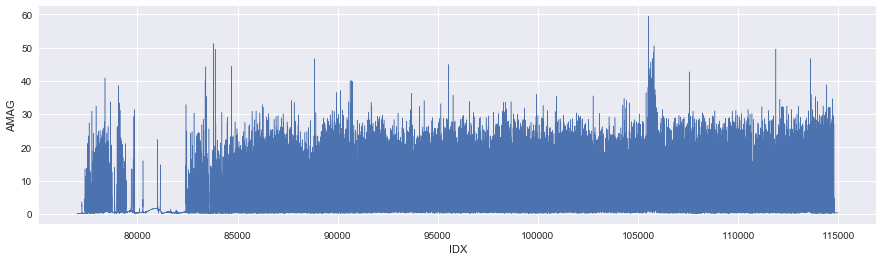

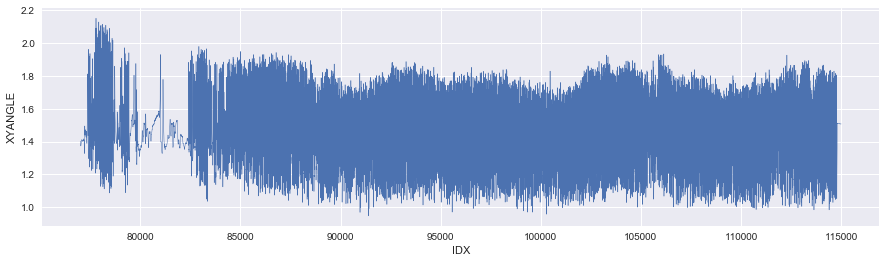

In [80]:
df_bkg = cut( df_bkg , 77000 , 115000 )
df_bkg = cut( df_bkg , 52000 , 54000 )
df_bkg = cut( df_bkg , 53000 , 59000 )
df_bkg = cut( df_bkg , 127500 , 139000 )
df_bkg = cut( df_bkg , 163000 , 164000 )
df_bkg = cut( df_bkg , 110000 , 125000 )
df_bkg = cut( df_bkg , 135000 , 140000 )
df_bkg = cut( df_bkg , 42000 , 50000 )

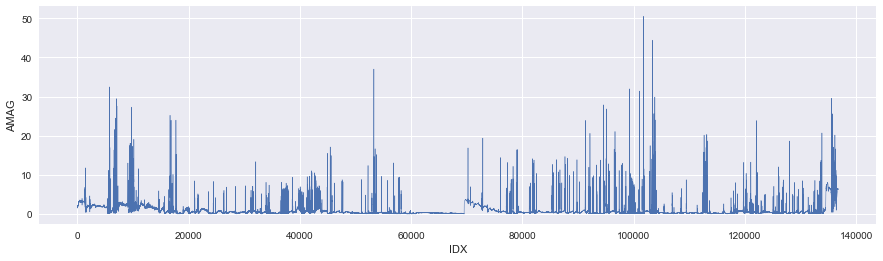

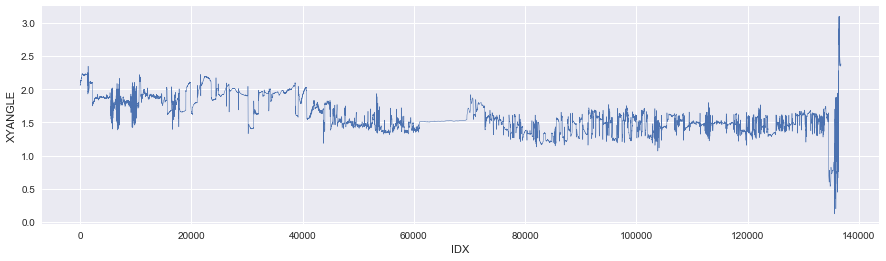

In [105]:
make_plots( df_bkg )

In [106]:
df_bkg.to_csv( 'df_bkg_X1_thru_X5_LL_clean.csv' , index=False )

## CT Data

In [5]:
df_new = None
for subj in ['X16','X17','X18','X19','X20']:
    for label in [ 'walk' ]:
        df = grab_df( subj , 'LL' , label )
        if df_new is None:
            df_new = df
        else:
            df_new = df_new.append( df )

['rabbit_run/XEED_RabbitRun_Files/walk/X16_LL_CT_NA_walk.bin']
Computing features for AMAG 160
Computing features for AZ 160
Computing features for ATRAN 160
Computing features for XYANGLE 160
Shape = (44930, 70)
['rabbit_run/XEED_RabbitRun_Files/walk/X17_LL_CT_NA_walk.bin']
Computing features for AMAG 160
Computing features for AZ 160
Computing features for ATRAN 160
Computing features for XYANGLE 160
Shape = (44419, 70)
['rabbit_run/XEED_RabbitRun_Files/walk/X18_LL_CT_NA_walk.bin']
Computing features for AMAG 160
Computing features for AZ 160
Computing features for ATRAN 160
Computing features for XYANGLE 160
Shape = (50712, 70)
['rabbit_run/XEED_RabbitRun_Files/walk/X19_LL_CT_NA_walk.bin']
Computing features for AMAG 160
Computing features for AZ 160
Computing features for ATRAN 160
Computing features for XYANGLE 160
Shape = (45514, 70)
['rabbit_run/XEED_RabbitRun_Files/walk/X20_LL_CT_NA_walk.bin']
Computing features for AMAG 160
Computing features for AZ 160
Computing features for 

In [6]:
df_new['DATETIME'] = df_new.index
df_new.index = range(len(df_new))
df_new.shape

(261242, 71)

In [11]:
df_new = cut( df_new , 197500 , 199500 )
df_new = cut( df_new , 210500 , 215700 )
df_new = cut( df_new , 222750 , 224750 )
df_new = cut( df_new , 225800 , 229000 )
df_new = cut( df_new , 229000 , 229500 )
df_new = cut( df_new , 237250 , 239000 )
df_new = cut( df_new , 188000 , 191000 )

(259242, 71)


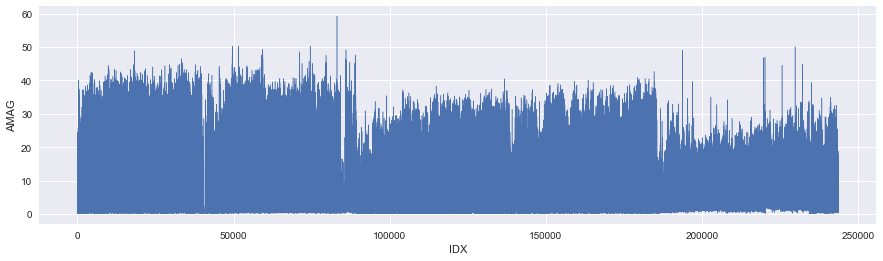

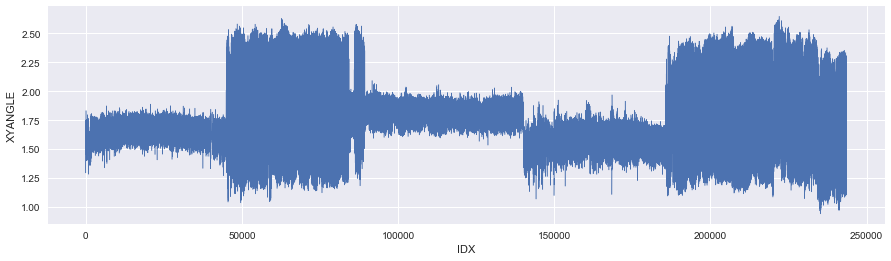

In [36]:
make_plots( df_new )

In [37]:
df_new.to_csv( 'df_sig_X16_thru_X20_LL_clean.csv' , index=False )

In [38]:
df_new = None
for subj in ['X16','X17','X18','X19','X20']:
    for label in [ 'pre' , 'post' ]:
        df = grab_df( subj , 'LL' , label )
        if df_new is None:
            df_new = df
        else:
            df_new = df_new.append( df )

['rabbit_run/XEED_RabbitRun_Files/pre/X16_LL_CT_NA_pre.bin']
Computing features for AMAG 160
Computing features for AZ 160
Computing features for ATRAN 160
Computing features for XYANGLE 160
Shape = (26148, 70)
['rabbit_run/XEED_RabbitRun_Files/post/X16_LL_CT_NA_post.bin']
Computing features for AMAG 160
Computing features for AZ 160
Computing features for ATRAN 160
Computing features for XYANGLE 160
Shape = (3468, 70)
['rabbit_run/XEED_RabbitRun_Files/pre/X17_LL_CT_NA_pre.bin']
Computing features for AMAG 160
Computing features for AZ 160
Computing features for ATRAN 160
Computing features for XYANGLE 160
Shape = (43241, 70)
['rabbit_run/XEED_RabbitRun_Files/post/X17_LL_CT_NA_post.bin']
Computing features for AMAG 160
Computing features for AZ 160
Computing features for ATRAN 160
Computing features for XYANGLE 160
Shape = (1608, 70)
['rabbit_run/XEED_RabbitRun_Files/pre/X18_LL_CT_NA_pre.bin']
Computing features for AMAG 160
Computing features for AZ 160
Computing features for ATRAN 16

In [39]:
df_new['DATETIME'] = df_new.index
df_new.index = range(len(df_new))
df_new.shape

(238305, 71)

In [42]:
df_new = cut( df_new , 21000 , 24000 )
df_new = cut( df_new , 128750 , 130000 )
df_new = cut( df_new , 231000 , 233000 )
df_new = cut( df_new , 228000 , 230000 )
df_new = cut( df_new , 224000 , 225000 )

(235305, 71)


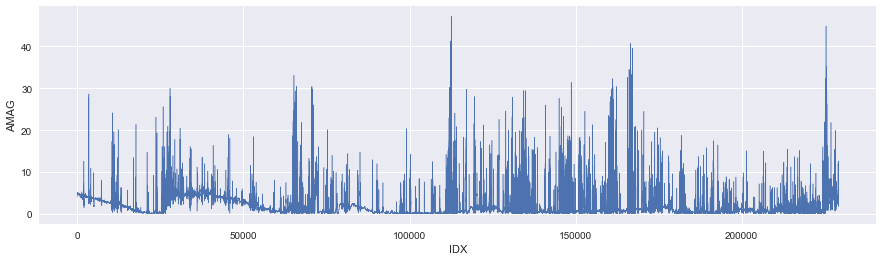

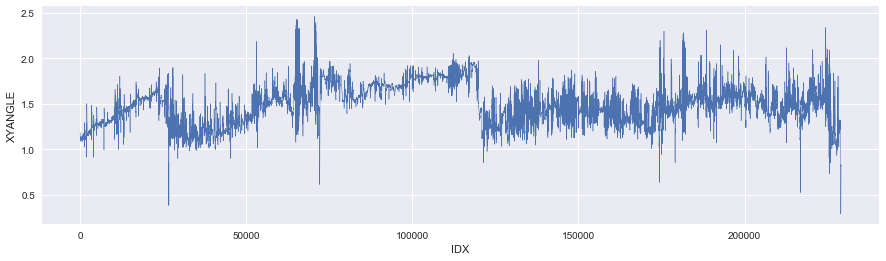

In [51]:
make_plots( df_new )

In [52]:
df_new.to_csv( 'df_bkg_X16_thru_X20_LL_clean.csv' , index=False )